# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

<hr>

# Assignment 8 - Charles Alders

Reading data from the r/datascience subreddit, stored in a sqlite database file.

In [2]:
import pandas as pd
import sqlite3

con = sqlite3.connect('ds_reddit.sqlite')
df = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
df.head()

,title,author,n_comments,score,text,link
0,Weekly Entering & Transitioning - Thread 27 Fe...,AutoModerator,46,6,\n\nWelcome to this week's entering & transit...,/r/datascience/comments/11d3a37/weekly_enterin...
1,How Unprofessional to leave after a year?,Subject-Resort5893,103,136,I’ve been offered a 50 percent pay bump to be ...,/r/datascience/comments/11gh1yv/how_unprofessi...
2,A more accessible python library for interacti...,Jota_Blanco,3,56,Hi all. My team has just open sourced a Python...,/r/datascience/comments/11g68dw/a_more_accessi...
3,"Web Dashboard Solution, leaning Dash",GeneCreemers69,19,12,"Hi all,\n\nI recently started as the first dat...",/r/datascience/comments/11ggw1n/web_dashboard_...
4,Job search is making me lose my mind,ryanhiga2019,32,7,I have a master’s degree in computer science f...,/r/datascience/comments/11gi0vc/job_search_is_...


Creating a new column that combines the post's title and body for analysis.

In [3]:
df["title_and_text"] = df["title"] + " " + df["text"]

## Extracting Sentiment Scores

Reading the AFINN sentiment scores to apply the the Reddit dataframe.

In [4]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [5]:
sentiment_dict = sentiment_df.to_dict()['score']

In [6]:
import numpy as np

text_sentiments = []
for text in df["title_and_text"]:
    words = text.lower().split()
    this_text_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_text_sentiments.append(sentiment_dict[w])
        else:
            this_text_sentiments.append(0)

    text_sentiments.append(np.mean(this_text_sentiments))

In [7]:
df["keyword_sentiment"] = text_sentiments

## Histogram

<AxesSubplot:ylabel='Frequency'>

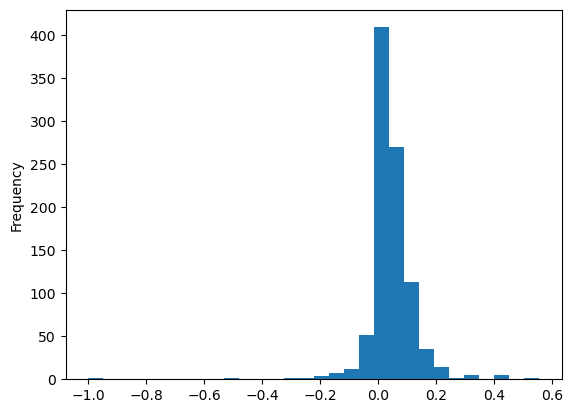

In [8]:
df["keyword_sentiment"].plot.hist(bins=30)

Looks like the sentiments trend toward the positive side, even after the 0 values.

## Descriptive Statistics

In [9]:
df["keyword_sentiment"].describe()

count    933.000000
mean       0.042923
std        0.081186
min       -1.000000
25%        0.000000
50%        0.034483
75%        0.073684
max        0.555556
Name: keyword_sentiment, dtype: float64

The mean of 0.043 confirms this - the sentiments are trending positively.

## Examining Text

In [10]:
top_scores = df.sort_values('keyword_sentiment', ascending=False)['title_and_text'].to_list()[:10]
print(top_scores)

['5 Best Ways to Optimize Database for Performance Improvement ', 'Ian Boggs as an Marvel Whatif Character ', 'Happiness and Meaning in What We Do ', 'Amazing data science work. way to reduce dimensionality for superior real time performance tracking. ', 'How important is AI audit? ', 'Pre screening tests be like ', 'Top 5 Data Science Certifications In-demand By Fortune 500 Firms in 2023 ', 'Best Courses/ Resources To Learn NLP From Basics ? ', "Anyone have valentine meme/puns related to data or tech? I'm looking for a funny or creative one!! &#x200B;\n\nhttps://preview.redd.it/w3txiyn398ha1.png?width=354&format=png&auto=webp&v=enabled&s=56540245a1226c843fb84ffbba89443d512d87ee", 'Audio book recommendations? You all got some good data science audio book recommendations? Thanks in advance']


From the highest sentiment scores, I can see words such as "best", "improvement", "happiness", "amazing", and many more positive words. These scores make sense to me!

In [11]:
bottom_scores = df.sort_values('keyword_sentiment', ascending=True)['title_and_text'].to_list()[:10]
print(bottom_scores)

['Model Madness Bracket Challenge ', 'Health Data Shocks with Strange Clots ', 'Find Kth Smallest Element, FAANG Interview Problem ', 'Preventing failures in modeling projects with the Model Impact Thesis framework ', 'The job description of this unpaid internship is insane ', 'How much of a threat to data science/scientists is AI ', 'Brain Tumor Detection Web Application using Transfer Learning: An End-To-End Project ', "When do you think this tech recession will be over? posted by your anxious undergrad senior who can't even get an internship", 'DSA Climbing Stairs Leetcode Problem Solved ', 'Using Computer Vision To Destroy a Childhood High Score in a DS Game ']


The words that stand out from the lowest scores are "madness", "shocks", "strange", "problem", and "failures". There are some issues that I can see with a couple of these items. For example, "Preventing failures in modeling projects with the Model impact Thesis framework" was classified as the 5th lowest sentiment score, but this topic is talking about learning and improving skills, and I would not consider it negative.

## Sentiment Scores in TextBlob

In [12]:
from textblob import TextBlob

def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title_and_text'].apply(get_tb_sentiment)

<AxesSubplot:ylabel='Frequency'>

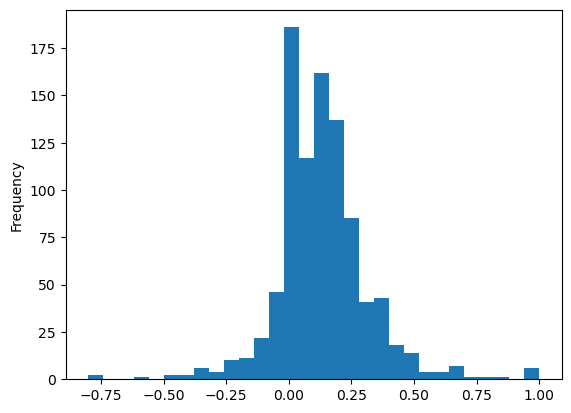

In [14]:
df['tb_sentiment'].plot.hist(bins=30)

In [16]:
df['tb_sentiment'].describe()

count    933.000000
mean       0.131423
std        0.186618
min       -0.800000
25%        0.000000
50%        0.123077
75%        0.215000
max        1.000000
Name: tb_sentiment, dtype: float64

TextBlob has a WAY higher mean sentiment score than the AFINN method.

In [21]:
top_scores = df.sort_values('tb_sentiment', ascending=False)['title_and_text'].head(10)
top_scores

899    Data Science Project Good morning everyone.  I...
11     DevOps or SWE Courses for ML? Hey All--\n\nHas...
437    8 Best Microsoft Azure Consulting Companies in...
488    Best Courses/ Resources To Learn NLP From Basi...
907    5 Best Ways to Optimize Database for Performan...
323    Reference for guiding model selection I'm look...
494    What was your best interview experience? Inter...
918    Y’all, using no precautions whatsoever, I trip...
134    Best way to store text data Let’s say I have a...
767    Are ML masters cash grabs by the uni? How do I...
Name: title_and_text, dtype: object

Some similar posts to AFINN - many still have keywords like "best".

## Most Common Negative Words

In [41]:
import nltk

from nltk.corpus import stopwords
stops = stopwords.words('english')

stops = stops + ["data", "science", "-", "i'm", "ds", "+", ",", "...", '"o",']

In [42]:
words = ' '.join(df.sort_values("tb_sentiment", ascending=True)["title_and_text"][:10]).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [43]:
fd = nltk.FreqDist(cleaned_words)
fd.most_common(20)

[('like', 5),
 ('text', 4),
 ('start', 3),
 ('salary', 3),
 ('python', 3),
 ('career', 2),
 ('even', 2),
 ('data-centric', 2),
 ('model-centric', 2),
 ('tell', 2),
 ('companies', 2),
 ('year', 2),
 ('looking', 2),
 ('keep', 2),
 ('getting', 2),
 ('insulting', 2),
 ('job', 2),
 ('role', 2),
 ('wasting', 2),
 ('told', 2)]

Looks like there are some (assumingly) negative posts about salary, python, and careers. Also, I notice words like "insulting", and "wasting".

# Summary

In this assignment I used both AFINN and TextBlob to extract sentiment scores from the title and body text of Reddit posts in the r/datascience subreddit. AFINN returned a mean sentiment score of 0.043, while TextBlob had a far greater mean of 0.13, most likely due to the extra words it has classified. Both histograms do show a trend in the positive direction for the sentiment scores. In examining the text for the top and bottom scores, I found that a few of the entries appeared as positive or negative, but a human reading them may actually classify them as the opposite. One example is "Preventing failures in modeling projects with the Model impact Thesis framework" receiving a negative sentiment score, but I would argue that the actual meaning leans to the positive side. This data, specifically, could be used for subreddit moderation. An AutoModerator could use an advanced sentiment model to help decide if a post has broken the rules or not, and remove the post accordingly. In general, sentiment analysis has a wide range of uses, but I can see companies using these techniques to get a better understanding of their consumers' thoughts on a product.